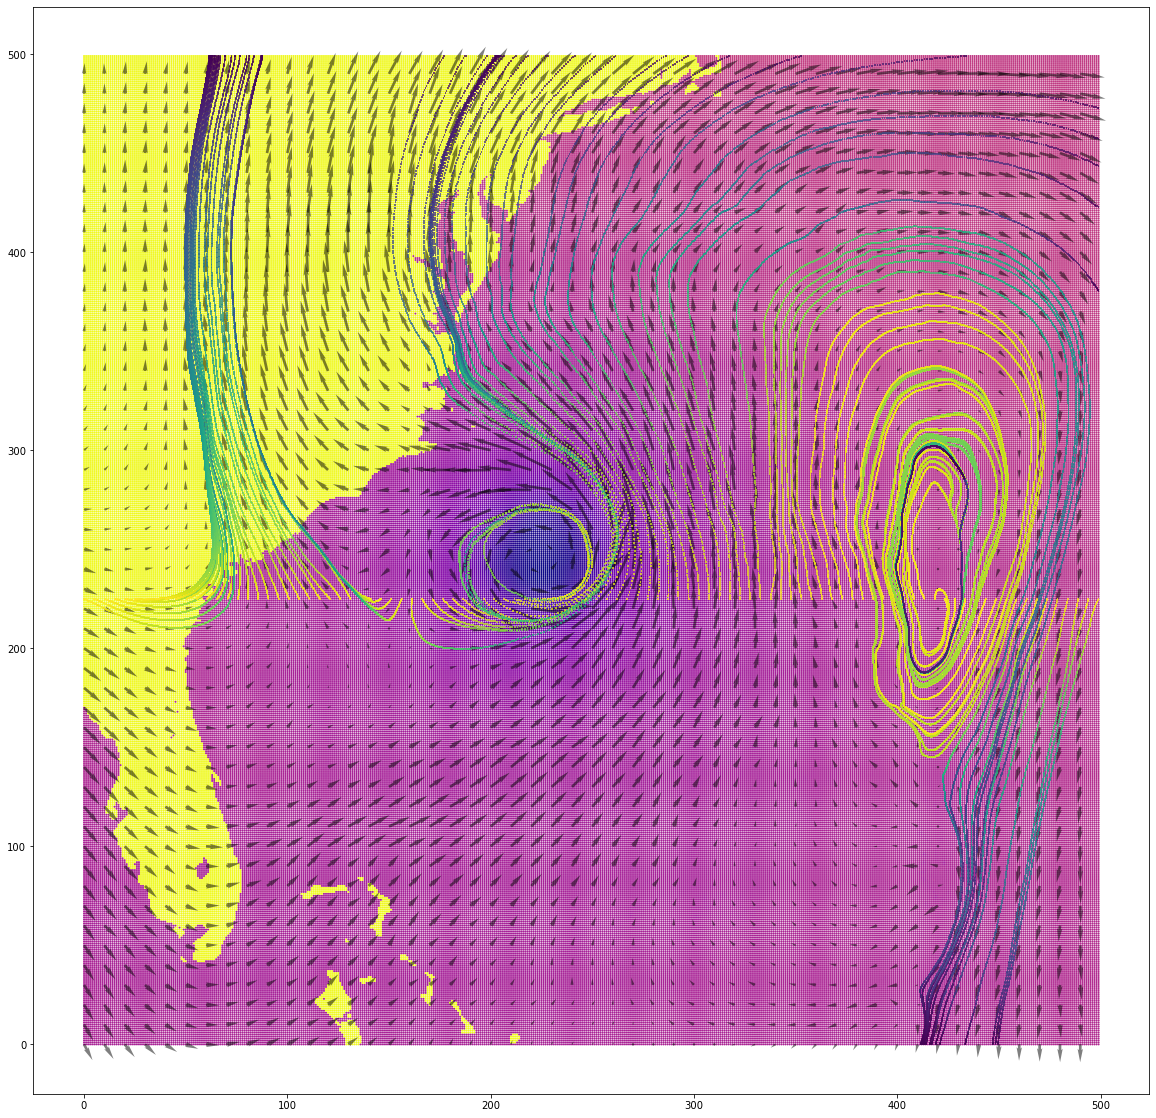

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

uData = []
vData = []

##### data loading and setup/plot image
##### argument "showBgMap": show or not to show the background map
##### DO NOT modify this function
def Initialize( showBgMap = False ):
    global uData
    global vData
    
    loadFlowData = np.load(file = "flowData.npy", allow_pickle = True)

    ### flow data
    uData = loadFlowData.item().get('uData')
    vData = loadFlowData.item().get('vData')

    plt.rcParams['figure.figsize'] = [20, 20]
    
    ### plot backgroup images
    presMapX = loadFlowData.item().get('presMapX')
    presMapY = loadFlowData.item().get('presMapY')
    presMapV = loadFlowData.item().get('presMapV')
    if showBgMap == True:
        plt.scatter(presMapX, presMapY, s=1, c=presMapV, cmap='plasma')
    
    ### plot arrows
    x_pos = loadFlowData.item().get('x_pos')
    y_pos = loadFlowData.item().get('y_pos')
    x_direct = loadFlowData.item().get('x_direct')
    y_direct = loadFlowData.item().get('y_direct')       
    plt.quiver(x_pos, y_pos, x_direct, y_direct, scale = 50,  headwidth = 2, headlength = 5, alpha = 0.5)


##### x, y: location. Return: 2D vector at [x,y] (x and y are integer only)
##### return: a 2D vector [u, v], u is horizontal direction (right is postivie), v is the vertical direction (up is positive)
##### DO NOT modify this function
def getDataVector(x, y):
    return uData[(499-y)+500*x], vData[(499-y)+500*x]


##### this function generates "numSeeds" points(seeds) from [startX, startY] to [endX, endY]
##### Return: seeds -> a list of [x, y] 
def generateSeeds(startX, startY, endX, endY, numSeeds):
    seeds = []
    x = np.linspace(startX, endX, numSeeds )
    y = np.linspace(startY, endY, numSeeds )
    seeds = np.zeros([numSeeds,2])
    seeds[:, 0] = x
    seeds[:, 1] = y
    return seeds

##### this function plot a particle tracing result on the screen
##### argument "path": particle tracing result. It is represetned by a list of [x, y]. (x, y) can be floating point
##### You may not want to modify this function
def drawOneParticleTracingResult( path ):
    ps = np.array(path)
    c = np.linspace(1, 0, num=ps.shape[0])
    plt.scatter(ps[:,0], ps[:,1], c=c, s=3, marker='_')

##### (TODO) WORK on this function
##### compute ONE particle tracing result
##### you should use "getDataVector())" to get the vector you want on the grid point
##### if you need the vector between grid points, you have to implment the vector interpolation by your self
##### I do not mind the computation is efficnet or not
##### "seed": one seed (x,y)
##### "t": delta t (i suggest 0.025)
##### "steps": how many stesp for this particle tracing process

# check if the point is outside the map
def check(newPos):
    ret_flag = False
    if newPos[0] > 499.0:
        newPos[0] = 499.0
        ret_flag = True
    if newPos[1] > 499.0:
        newPos[1] = 499.0
        ret_flag = True
    if newPos[0] < 0.0:
        newPos[0] = 0.0
        ret_flag = True
    if newPos[1] < 0.0:
        newPos[1] = 0.0
        ret_flag = True
    return newPos, ret_flag

# return a np.array() of x, y point's vector
def getPointVector(pos):
    x = pos[0]
    y = pos[1]
    left = int(x)
    right = int(x) + 1
    if right == 500: right = 499
    up = int(y) + 1
    down = int(y)
    if up == 500: up = 499
        
    left_up    = np.array(getDataVector(left, up))
    left_down  = np.array(getDataVector(left, down))
    right_up   = np.array(getDataVector(right, up))
    right_down = np.array(getDataVector(right, down))
    
    xr = x - left
    yr = y - down
    
    up_xy = (right_up - left_up) * xr + left_up
    down_xy = (right_down - left_down) * xr + left_down
    
    ret = (up_xy - down_xy) * yr + down_xy
    
    return ret

# implement rk4
def rk4(pos, t):
    pos = np.array(pos)
    a = 2 * t * getPointVector(pos)
    b = 2 * t * getPointVector(pos + (a / 2))
    c = 2 * t * getPointVector(pos + (b / 2))
    d = 2 * t * getPointVector(pos + (c / 2))
    ret = list(pos + ((a + (2 * b) + (2 * c) + d) / 6))
    return ret

def particleTrace(seed, t, steps):
    ret = [seed]
    nowPos = seed
    for i in range(steps):
        break_flag = False
        newPos, break_flag = check(rk4(nowPos, t))
        ret.append(newPos)
        nowPos = newPos
        if break_flag:
            break
    return ret

##### main (if you want, you can change the arguments in the generateSeeds() and the last argument in particleTrace() )
Initialize(True) ## set False to disable backgroup image display (faster a little bit)

seeds = generateSeeds(0, 225, 499, 225, 100) ##this line generates seeds (seeds to generate the graph on the homework description slides)
    
for seed in seeds: ###iterate through all seeds
    path = particleTrace(seed, 0.025, 10000) # compute one particle tracing of the "seed", result is a list of [x,y ]
    drawOneParticleTracingResult(path) # draw one particle path

plt.show()